In [2]:
pip install einops

In [3]:
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import sys
sys.path.append('/content/drive/MyDrive/OCTA500/Project/TransUnet')

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# **Test TransUnet Model**

## Load Model and Evaluate the Model

In [7]:
from torch.utils.data import DataLoader
from utils_octa.octdataset import OCTDataset
from train_transunet import TransUNetSeg
from utils_octa.utils_octa import precision_score_, recall_score_, accuracy_, dice_coef, iou

In [8]:
# Initialize the model and load the trained weights
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model = TransUNetSeg(device)
model.load_model('/content/drive/MyDrive/OCTA500/Project/TransUnet/best_model.pth')

### OCTA-500 TEST DATA

In [9]:
# Load test dataset
test_octa = OCTDataset(npz_path='/content/drive/MyDrive/OCTA500/Project/TransUnet/test_octa500.npz')
test_loader = DataLoader(test_octa, batch_size=1, shuffle=False)

# Switch the model to evaluation mode
model.model.eval()

# Store predictions and compute scores
all_dice_scores_octa = []
all_iou_scores_octa = []
all_accuracy_octa = []
all_recall_scores_octa = []
all_precision_scores_octa = []
predicted_masks_octa = []

num_layers = 6  # Number of layers in the mask

with torch.no_grad():
    for data in test_loader:
        img, true_mask = data['img'].to(device), data['mask'].to(device)
        pred_mask = model.model(img)

        # Apply sigmoid and threshold the predicted mask
        pred_mask = torch.sigmoid(pred_mask)
        pred_mask[pred_mask >= 0.5] = 1
        pred_mask[pred_mask < 0.5] = 0

        # Calculate metrics for each layer
        dice_scores = dice_coef(true_mask, pred_mask, num_layers)
        iou_scores = iou(true_mask, pred_mask, num_layers)
        accuracy = accuracy_(true_mask, pred_mask, num_layers)
        recall_score = recall_score_(true_mask, pred_mask, num_layers)
        precision_score = precision_score_(true_mask, pred_mask, num_layers)

        all_dice_scores_octa.append(dice_scores)
        all_iou_scores_octa.append(iou_scores)
        all_accuracy_octa.append(accuracy)
        all_recall_scores_octa.append(recall_score)
        all_precision_scores_octa.append(precision_score)

        # Store the predicted mask
        predicted_masks_octa.append(pred_mask.cpu().numpy())

# Convert list of scores to a numpy array for easier analysis
all_dice_scores = np.array(all_dice_scores_octa)
all_iou_scores = np.array(all_iou_scores_octa)
all_accuracy = np.array(all_accuracy_octa)
all_recall_scores = np.array(all_recall_scores_octa)
all_precision_scores = np.array(all_precision_scores_octa)

# Average scores across all layers
avg_dice_per_layer_octa = np.mean(all_dice_scores, axis=0)
avg_iou_per_layer_octa = np.mean(all_iou_scores, axis=0)
avg_accuracy_per_layer_octa = np.mean(all_accuracy, axis=0)
avg_recall_per_layer_octa = np.mean(all_recall_scores, axis=0)
avg_precision_per_layer_octa = np.mean(all_precision_scores, axis=0)

print("Scores for OCTA-500 Dataset")
print(f'Average Dice Score per Layer: {avg_dice_per_layer_octa}')
print(f'Average IOU Score per Layer: {avg_iou_per_layer_octa}')
print(f'Average Accuracy Score per Layer: {avg_accuracy_per_layer_octa}')
print(f'Average Recall Score per Layer: {avg_recall_per_layer_octa}')
print(f'Average Precision Score per Layer: {avg_precision_per_layer_octa}')

# Save predicted masks
np.savez('/content/drive/MyDrive/OCTA500/Project/TransUnet/predicted_masks_octa.npz', masks=np.array(predicted_masks_octa))


Scores for OCTA-500 Dataset
Average Dice Score per Layer: [0.608464 0.420076 0.425488 0.581776 0.551416 0.545884]
Average IOU Score per Layer: [0.444824 0.27866  0.28248  0.425956 0.390384 0.387344]
Average Accuracy Score per Layer: [0.997944 0.997436 0.997236 0.998064 0.997672 0.997724]
Average Recall Score per Layer: [0.745728 0.478988 0.517452 0.664488 0.683192 0.656124]
Average Precision Score per Layer: [0.514552 0.38666  0.37992  0.529172 0.474136 0.478272]


### OPTOVUE TEST DATA

In [10]:
# Load test dataset
test_opt = OCTDataset(npz_path='/content/drive/MyDrive/OCTA500/Project/TransUnet/test_optovue.npz')
test_loader = DataLoader(test_opt, batch_size=1, shuffle=False)

# Switch the model to evaluation mode
model.model.eval()

# Store predictions and compute scores
all_dice_scores_opt = []
all_iou_scores_opt = []
all_accuracy_opt = []
all_recall_scores_opt = []
all_precision_scores_opt = []
predicted_masks_opt = []

num_layers = 6  # Number of layers in the mask

with torch.no_grad():
    for data in test_loader:
        img, true_mask = data['img'].to(device), data['mask'].to(device)
        pred_mask = model.model(img)

        # Apply sigmoid and threshold the predicted mask
        pred_mask = torch.sigmoid(pred_mask)
        pred_mask[pred_mask >= 0.5] = 1
        pred_mask[pred_mask < 0.5] = 0

        # Calculate metrics for each layer
        dice_scores = dice_coef(true_mask, pred_mask, num_layers)
        iou_scores = iou(true_mask, pred_mask, num_layers)
        accuracy = accuracy_(true_mask, pred_mask, num_layers)
        recall_score = recall_score_(true_mask, pred_mask, num_layers)
        precision_score = precision_score_(true_mask, pred_mask, num_layers)

        all_dice_scores_opt.append(dice_scores)
        all_iou_scores_opt.append(iou_scores)
        all_accuracy_opt.append(accuracy)
        all_recall_scores_opt.append(recall_score)
        all_precision_scores_opt.append(precision_score)

        # Store the predicted mask
        predicted_masks_opt.append(pred_mask.cpu().numpy())

# Convert list of scores to a numpy array for easier analysis
all_dice_scores = np.array(all_dice_scores_opt)
all_iou_scores = np.array(all_iou_scores_opt)
all_accuracy = np.array(all_accuracy_opt)
all_recall_scores = np.array(all_recall_scores_opt)
all_precision_scores = np.array(all_precision_scores_opt)

# Average scores across all layers
avg_dice_per_layer_opt = np.mean(all_dice_scores, axis=0)
avg_iou_per_layer_opt = np.mean(all_iou_scores, axis=0)
avg_accuracy_per_layer_opt = np.mean(all_accuracy, axis=0)
avg_recall_per_layer_opt = np.mean(all_recall_scores, axis=0)
avg_precision_per_layer_opt = np.mean(all_precision_scores, axis=0)

print("Scores for Optovue Dataset")
print(f'Average Dice Score per Layer: {avg_dice_per_layer_opt}')
print(f'Average IOU Score per Layer: {avg_iou_per_layer_opt}')
print(f'Average Accuracy Score per Layer: {avg_accuracy_per_layer_opt}')
print(f'Average Recall Score per Layer: {avg_recall_per_layer_opt}')
print(f'Average Precision Score per Layer: {avg_precision_per_layer_opt}')

# Save predicted masks
np.savez('/content/drive/MyDrive/OCTA500/Project/TransUnet/predicted_masks_opt.npz', masks=np.array(predicted_masks_opt))


Scores for Optovue Dataset
Average Dice Score per Layer: [0.06924 0.08414 0.06441 0.00892 0.      0.0192 ]
Average IOU Score per Layer: [0.0376  0.04587 0.03418 0.00495 0.      0.01005]
Average Accuracy Score per Layer: [0.99424 0.99606 0.9954  0.99522 0.99429 0.99464]
Average Recall Score per Layer: [0.08675 0.07621 0.06327 0.00944 0.      0.02038]
Average Precision Score per Layer: [0.05777 0.10146 0.06983 0.00869 0.      0.01849]


## PLOT MASKS

### OCTA-500

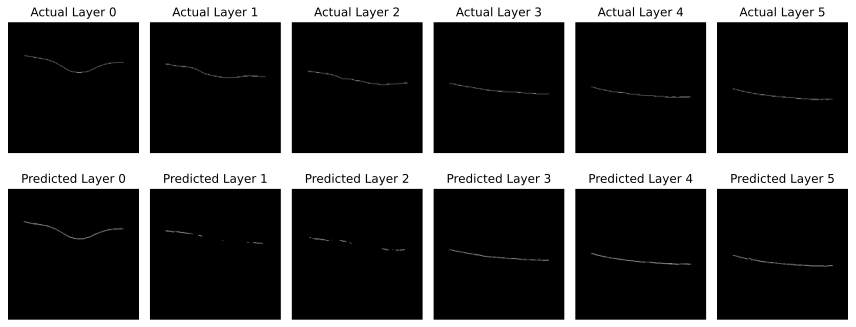

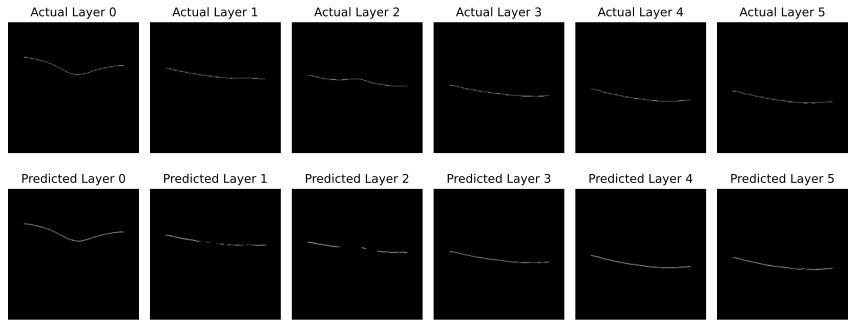

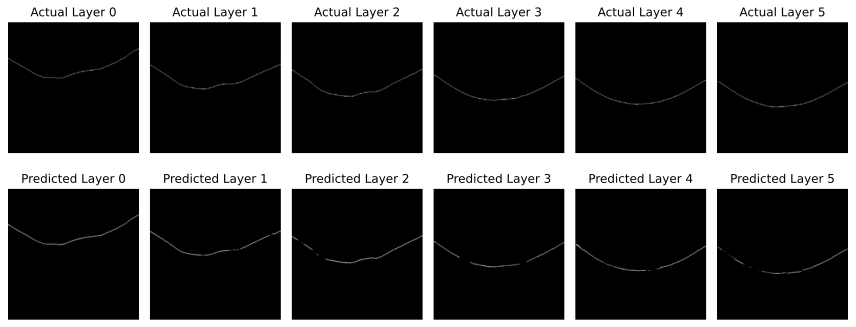

In [11]:
test_octa = np.load('/content/drive/MyDrive/OCTA500/Project/TransUnet/test_octa500.npz')
predicted_masks_npz = np.load('/content/drive/MyDrive/OCTA500/Project/TransUnet/predicted_masks_octa.npz')
actual_masks_octa = test_octa['mask']
predicted_masks_octa = predicted_masks_npz['masks']

# predicted_masks shape is (250, 1, 6, 512, 512), we need to remove the singleton dimension
if predicted_masks_octa.shape[1] == 1:
    predicted_masks_octa = predicted_masks_octa.squeeze(1)

# Select a few examples to display
num_examples = 3
examples = np.random.choice(len(actual_masks_octa), num_examples, replace=False)

# Number of layers in each mask
num_layers = 6

# Plot the examples
for idx in examples:
    fig, axes = plt.subplots(2, num_layers, figsize=(12, 5))

    for layer in range(num_layers):
        # Actual Mask Layer
        axes[0, layer].imshow(actual_masks_octa[idx][layer], cmap='gray')
        axes[0, layer].set_title(f'Actual Layer {layer}')
        axes[0, layer].axis('off')

        # Predicted Mask Layer
        axes[1, layer].imshow(predicted_masks_octa[idx][layer], cmap='gray')
        axes[1, layer].set_title(f'Predicted Layer {layer}')
        axes[1, layer].axis('off')

    plt.tight_layout()
    plt.savefig("predictedlayersoct.pdf")
    plt.show()


### OPTOVUE

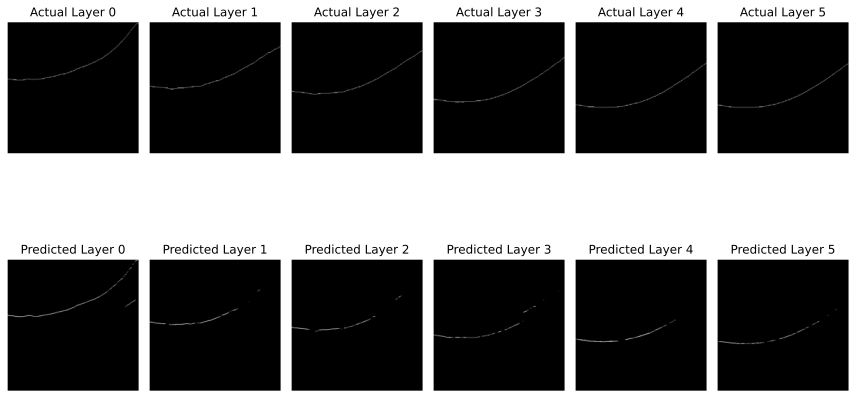

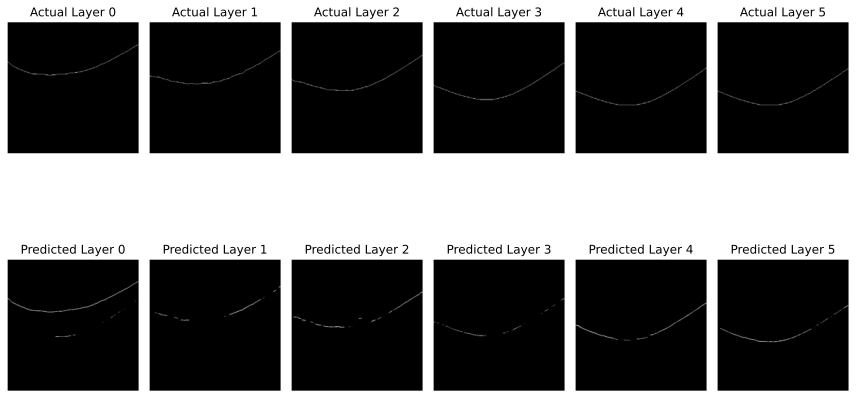

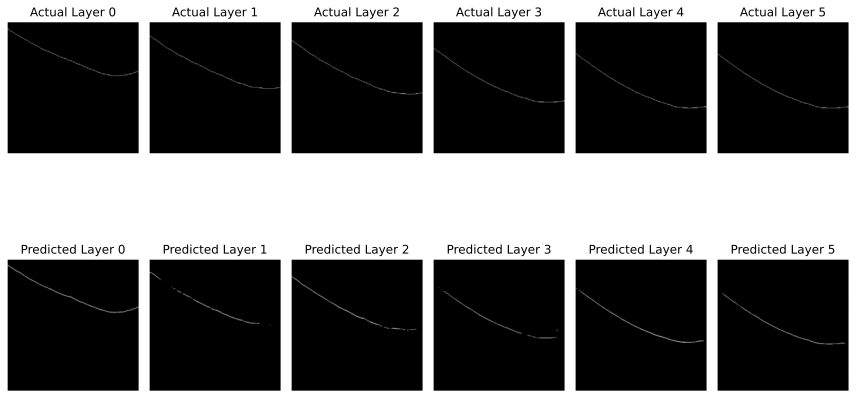

In [12]:
test_opt = np.load('/content/drive/MyDrive/OCTA500/Project/TransUnet/test_optovue.npz')
predicted_masks_npz = np.load('/content/drive/MyDrive/OCTA500/Project/TransUnet/predicted_masks_opt.npz')  # Replace with the path to your predicted masks .npz file

actual_masks_opt = test_opt['mask']
predicted_masks_opt = predicted_masks_npz['masks']

if predicted_masks_opt.shape[1] == 1:
    predicted_masks_opt = predicted_masks_opt.squeeze(1)

# Select a few examples to display
num_examples = 3  # You can change this number
examples = np.random.choice(len(actual_masks_opt), num_examples, replace=False)

# Number of layers in each mask
num_layers = 6  # Assuming there are 6 layers

# Plot the examples
for idx in examples:
    fig, axes = plt.subplots(2, num_layers, figsize=(12, 8))

    for layer in range(num_layers):
        # Actual Mask Layer
        axes[0, layer].imshow(actual_masks_opt[idx][layer], cmap='gray')
        axes[0, layer].set_title(f'Actual Layer {layer}')
        axes[0, layer].axis('off')

        # Predicted Mask Layer
        axes[1, layer].imshow(predicted_masks_opt[idx][layer], cmap='gray')
        axes[1, layer].set_title(f'Predicted Layer {layer}')
        axes[1, layer].axis('off')

    plt.tight_layout()
    plt.savefig("predictedlayersopt.pdf")
    plt.show()


## PLOT LAYERS ON B-SCANS

In [13]:
def convert_masks_to_height_arrays(masks):
    num_masks, num_layers, _, width = masks.shape
    height_arrays = np.zeros((num_masks, num_layers, width))

    for mask_index in range(num_masks):
        for layer_index in range(num_layers):
            for w in range(width):
                # Find the first occurrence of 1 in the column
                height_position = np.argmax(masks[mask_index, layer_index, :, w] > 0)
                height_arrays[mask_index, layer_index, w] = height_position

    return height_arrays

In [14]:
def plot_layer_comparison(images, actual_heights, predicted_heights, example_index, layer_names=['ILM', 'IPL', 'OPL', 'ISOS', 'RPE', 'BM'], exclude_value=0):
    num_layers, width = actual_heights.shape

    # Create a mask to exclude points with the specified value
    actual_mask = actual_heights != exclude_value
    predicted_mask = predicted_heights != exclude_value

    # Plot actual image with actual layer heights
    plt.subplot(len(examples), 2, 2 * example_index - 1)
    plt.imshow(images, cmap='gray', alpha=1)  # Set alpha to make the image semi-transparent
    colors_actual = plt.cm.viridis(np.linspace(0, 1, num_layers))
    for layer in range(num_layers):
        # Apply the mask to exclude specified points
        x_values = np.where(actual_mask[layer], np.arange(width), np.nan)
        y_values = np.where(actual_mask[layer], actual_heights[layer], np.nan)
        plt.plot(x_values, y_values, label=f'{layer_names[layer]}', color=colors_actual[layer])
    plt.title(f'Actual Layer Heights - Example {example_index}')
    plt.xlabel('Width Position')
    plt.ylabel('Layer Height')
    plt.legend()

    # Plot actual image with predicted layer heights
    plt.subplot(len(examples), 2, 2 * example_index)
    plt.imshow(images, cmap='gray', alpha=1)  # Same image as background
    colors_predicted = plt.cm.viridis(np.linspace(0, 1, num_layers))
    for layer in range(num_layers):
        # Apply the mask to exclude specified points
        x_values = np.where(predicted_mask[layer], np.arange(width), np.nan)
        y_values = np.where(predicted_mask[layer], predicted_heights[layer], np.nan)
        plt.plot(x_values, y_values, label=f'{layer_names[layer]}', color=colors_predicted[layer])
    plt.title(f'Predicted Layer Heights - Example {example_index}')
    plt.xlabel('Width Position')
    plt.ylabel('Layer Height')
    plt.legend()

### OCTA-500

In [15]:
actual_heights_octa = convert_masks_to_height_arrays(actual_masks_octa)
predicted_heights_octa = convert_masks_to_height_arrays(predicted_masks_octa)

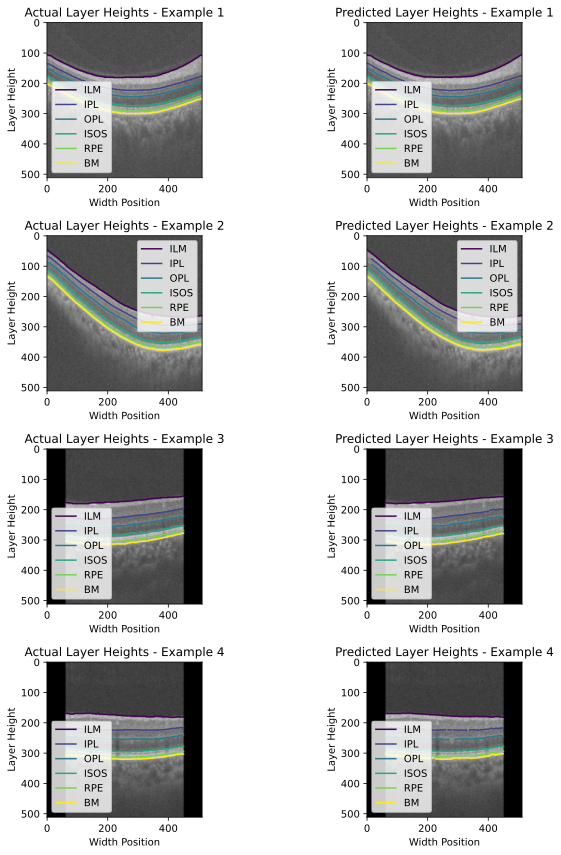

In [21]:
examples = [10, 21, 4, 99]

plt.figure(figsize=(10, 3 * len(examples)))

for i, example_index in enumerate(examples, start=1):
    actual_heights_i = actual_heights_octa[example_index]
    predicted_heights_i = predicted_heights_octa[example_index]
    image = test_octa['img'][example_index]

    plot_layer_comparison(image, actual_heights_i, predicted_heights_i, i, layer_names=['ILM', 'IPL', 'OPL', 'ISOS', 'RPE', 'BM'], exclude_value=0)

plt.tight_layout()
plt.savefig("predlayers2oct.pdf")
plt.show()

### Optovue

In [22]:
actual_heights_opt = convert_masks_to_height_arrays(actual_masks_opt)
predicted_heights_opt = convert_masks_to_height_arrays(predicted_masks_opt)

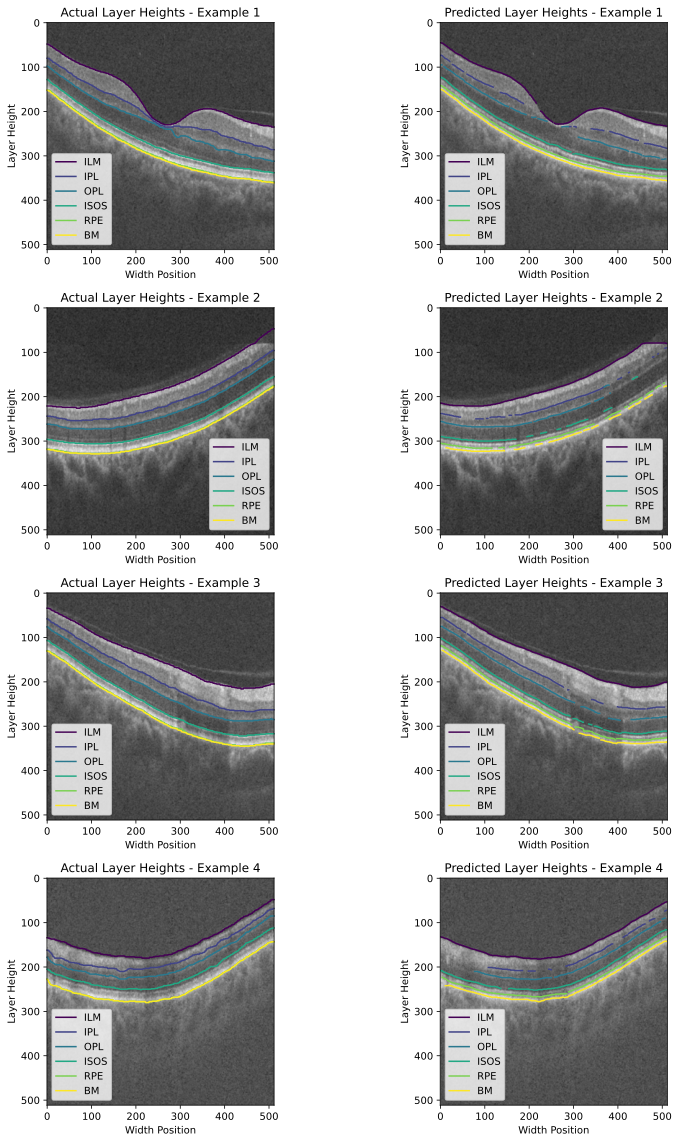

In [23]:
plt.figure(figsize=(12, 4 * len(examples)))

for i, example_index in enumerate(examples, start=1):
    actual_heights_i = actual_heights_opt[example_index]
    predicted_heights_i = predicted_heights_opt[example_index]
    image = test_opt['img'][example_index]

    plot_layer_comparison(image, actual_heights_i, predicted_heights_i, i, layer_names=['ILM', 'IPL', 'OPL', 'ISOS', 'RPE', 'BM'], exclude_value=0)

plt.tight_layout()
plt.savefig("predlayers2opt.pdf")
plt.show()